# Analise da **Boston Housing**

Este conjunto de dados contém informações coletadas pelo Serviço de Censo dos EUA sobre habitação na área de Boston Mass. Foi obtido do arquivo StatLib (http://lib.stat.cmu.edu/datasets/boston) e foi usado extensivamente em todo o a literatura para avaliar algoritmos. No entanto, essas comparações foram feitas principalmente fora de Delve e, portanto, são um tanto suspeitas. O conjunto de dados é pequeno em tamanho, com apenas 506 casos. Os dados foram publicados originalmente por Harrison, D. e Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

# Setando os **primeiros parâmetros** para a análise:
Nesse momento estaremos importando as libs e carregando o Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [2]:
# Carregando o dataset
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

Por fim, poderemos tornar nosso dataset um dataframe e printar como estão organizados os dados de nosso dataframe


In [3]:
#transformando o dataset em um dataframe
#importando as variáveis independentes como data
#nome das colunas = feature_names
#variáveis dependentes chamadas como 
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)
df_w = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y.columns=["Prize"]
df_w.insert(0,'Prize',df_y,True)
df_w

,Prize,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Breve descrição de cada uma das variáveis:

* **CRIM** - per capita crime rate by town
* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town.
* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* **NOX** - nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** - proportion of owner-occupied units built prior to 1940
* **DIS** - weighted distances to five Boston employment centres
* **RAD** - index of accessibility to radial highways
* **TAX** - full-value property-tax rate per $10,000
* **PTRATIO** - pupil-teacher ratio by town
* **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT** - % lower status of the population

##Dessas temos

*   **variáveis contínuas**: CRIM , NOX , RM , AGE , DIS , PRATIO, LSTAT , ZN, B 
*  **variáveis discretas**: CHAS,RAD

In [4]:
# Descrição breve descrição estatistica de cada uma das variáveis
df_w.describe()

,Prize,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Box plot e Histograma de cada uma das variáveis para compreender a distribuição de dados

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


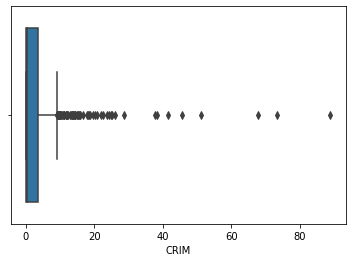

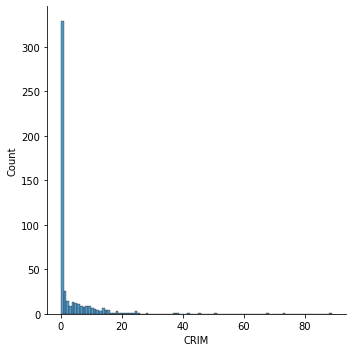

In [5]:
#CRIM
sns.boxplot(df_x['CRIM'])
sns.displot(df_x['CRIM'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


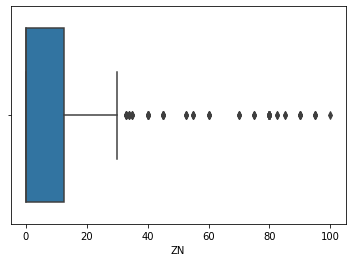

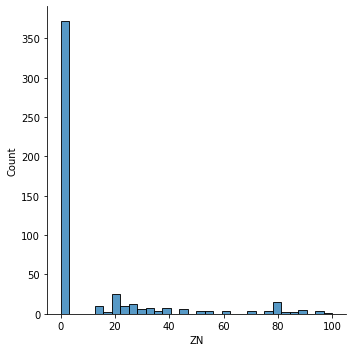

In [6]:
sns.boxplot(df_x['ZN'])
sns.displot(df_x['ZN'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


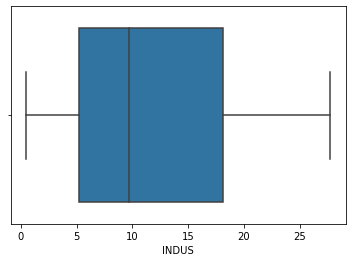

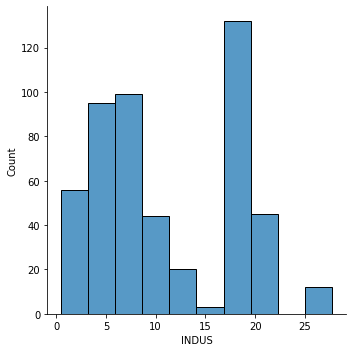

In [7]:
sns.boxplot(df_x['INDUS'])
sns.displot(df_x['INDUS'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


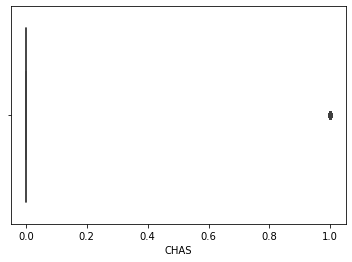

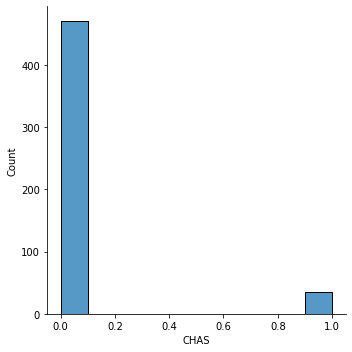

In [8]:
sns.boxplot(df_x['CHAS'])
sns.displot(df_x['CHAS'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


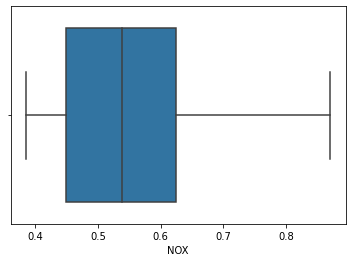

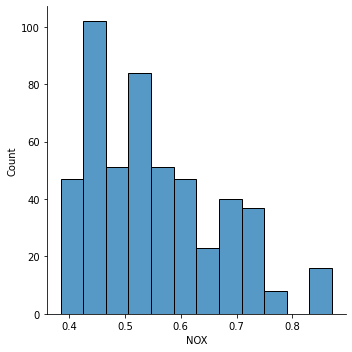

In [9]:
sns.boxplot(df_x['NOX'])
sns.displot(df_x['NOX'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


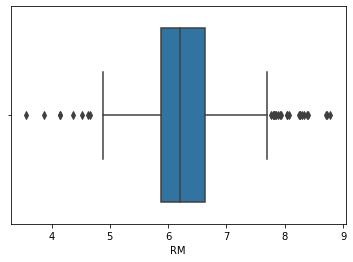

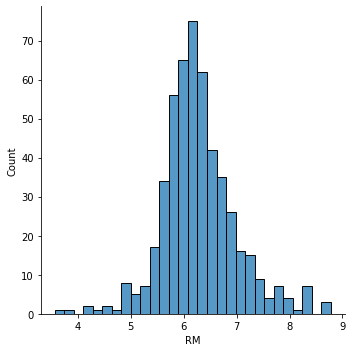

In [10]:
sns.boxplot(df_x['RM'])
sns.displot(df_x['RM'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


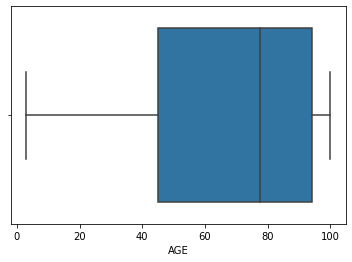

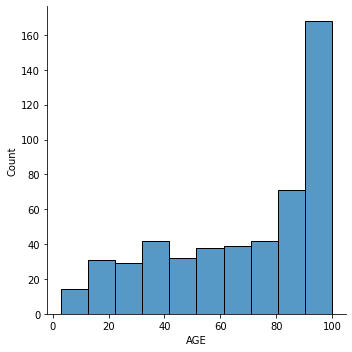

In [11]:
sns.boxplot(df_x['AGE'])
sns.displot(df_x['AGE'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


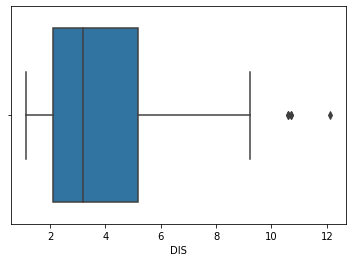

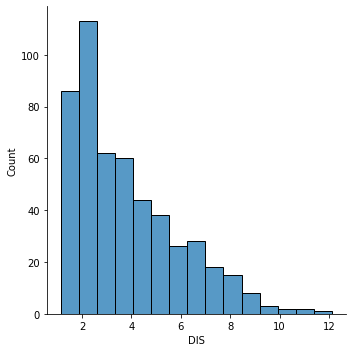

In [12]:
sns.boxplot(df_x['DIS'])
sns.displot(df_x['DIS'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


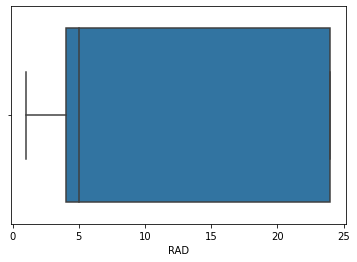

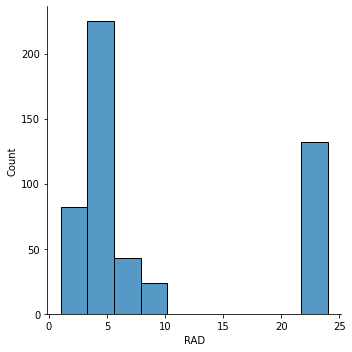

In [13]:
sns.boxplot(df_x['RAD'])
sns.displot(df_x['RAD'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


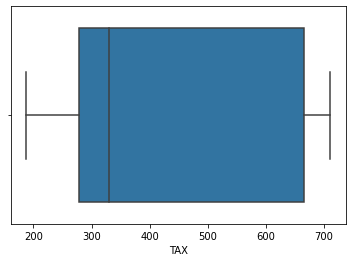

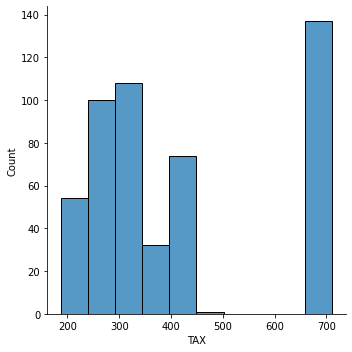

In [14]:
sns.boxplot(df_x['TAX'])
sns.displot(df_x['TAX'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


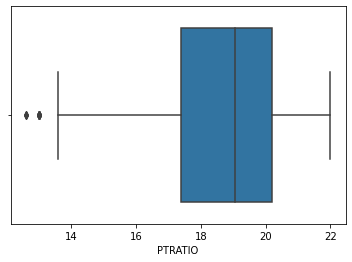

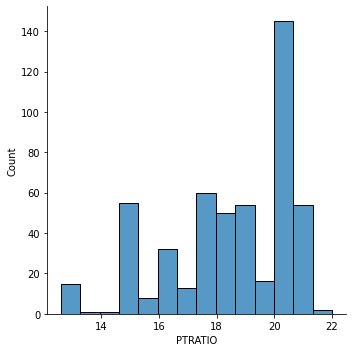

In [15]:
sns.boxplot(df_x['PTRATIO'])
sns.displot(df_x['PTRATIO'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


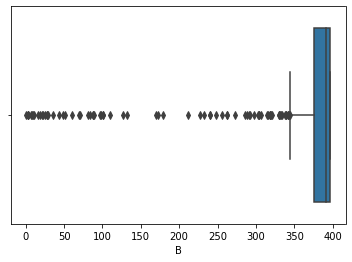

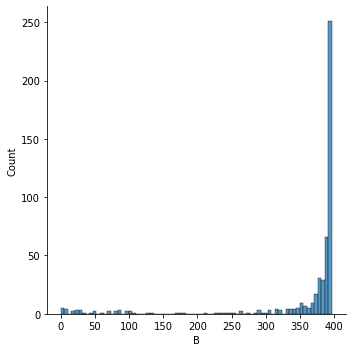

In [16]:
sns.boxplot(df_x['B'])
sns.displot(df_x['B'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


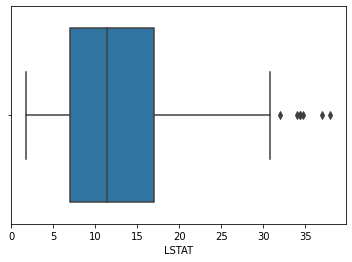

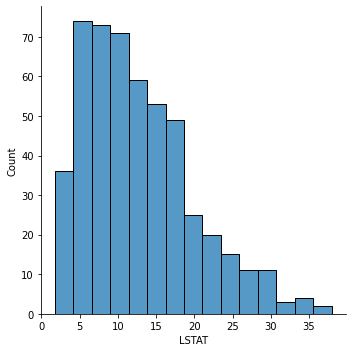

In [17]:
sns.boxplot(df_x['LSTAT'])
sns.displot(df_x['LSTAT'])

# Corelação entre as variáveis
Neste momento descreveremos alguns passos para encontrar relações e insigths sobre nosso dataframe, executaremos os seguintes passos
*   Matriz de correlação de Pearson
*   Plot visual da matriz de correlação



In [18]:
#Matriz de correlação de Pearson
df_w.corr(method='pearson')

,Prize,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Prize,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


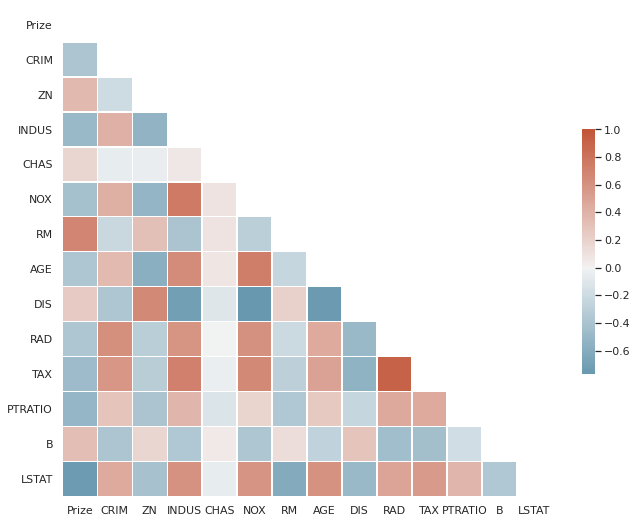

In [19]:
# Plotando a matriz de correlação
sns.set_theme(style="white")
mask = np.triu(np.ones_like(df_w.corr(method='pearson'), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(df_w.corr(method='pearson'), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

# Scatterplot para visualizar a relação entre feature e target
Baseado nos resultados apresentados através da matriz de correlação de Pearson, podemos agora plotar os scatterplots para entender as relações

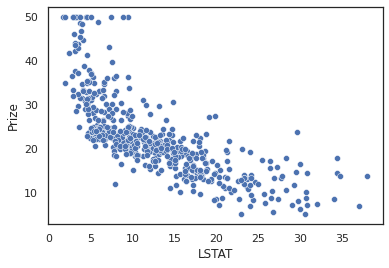

In [20]:
#LSTAT (Person:-0.737663)
sns.scatterplot(data=df_w,x='LSTAT', y='Prize',)

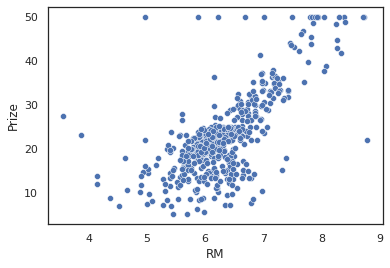

In [21]:
# RM (Person:0.695360)
sns.scatterplot(data=df_w,x='RM', y='Prize',)

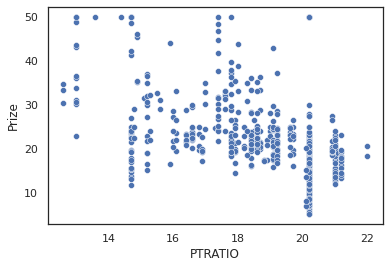

In [22]:
# PTRATIO (-0.507787)
sns.scatterplot(data=df_w,x='PTRATIO', y='Prize')

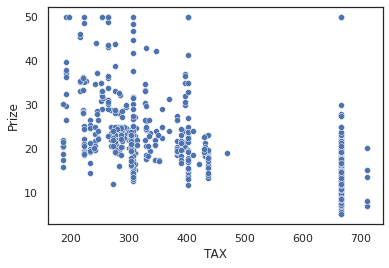

In [23]:
#TAX (Person:-0.468536)
sns.scatterplot(data=df_w,x='TAX', y='Prize')

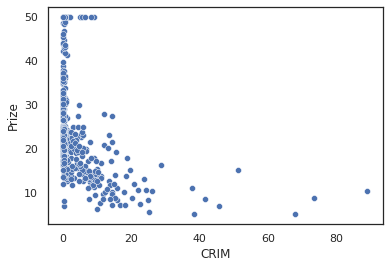

In [24]:
#CRIM (Person:-0.388305	)
sns.scatterplot(data=df_w,x='CRIM', y='Prize',)

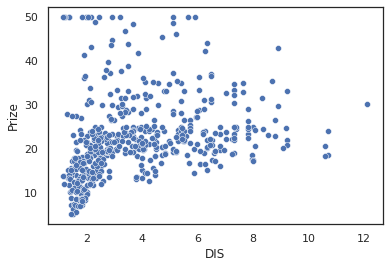

In [25]:
# DIS (Person:0.249929)
sns.scatterplot(data=df_w,x='DIS', y='Prize')

# Separação de bases e padronização das variáveis
Neste momento, as bases de dados serão separadas entre treino e teste, assim como será realizada a padronização das variáveis


In [26]:
# Criando os numpy arrays com as features e o target
X=np.array(df_x)
y=np.array(df_y)

In [27]:
# Separando a base de dados para teste e treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [28]:
# Separando a base de treino em outra base de treino e em uma base de validação
X_train2, X_val, y_train2, y_val = train_test_split(X_train,y_train, test_size = 0.33, random_state = 42)


In [29]:
# Fazendo a padronização das variáveis X_train2 e X_val
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2_scaled =scaler.fit_transform(X_train2)
X_val_scaled = scaler.transform(X_val)
print(scaler.mean_)



[3.42406850e+00 1.17114537e+01 1.11158150e+01 9.25110132e-02
 5.60761233e-01 6.27674009e+00 6.80651982e+01 3.77136256e+00
 9.34801762e+00 4.10176211e+02 1.82070485e+01 3.59824581e+02
 1.28596476e+01]


# Regressão Ridge
Neste momento, treinaremos a regreção Ridge com diferentes hiperpatrametos Alpha

In [30]:
#Valores para hiperparametro alpha para Ridge
hp = [0,1,5,10,20,25,30,35,36,40,50,55,100]


In [31]:
# Regressão Ridge X_train2
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Treinando o modelo
for k in hp:
  m = Ridge(alpha=k)
  m.fit(X_train2_scaled,y_train2)
  y_predr= m.predict(X_val_scaled)
  print(mean_squared_error(y_val,y_predr))



22.775750250035212
22.469283142858227
21.621378351039663
21.039554137441645
20.573695231583606
20.515413219048302
20.52274196892002
20.576311112220527
20.59138535933996
20.663558403550354
20.90745727500053
21.053722122788493
22.679594775111294


# Regressão Lasso
Neste momento, treinaremos a regreção Ridge com diferentes hiperpatrametos Alpha



In [32]:
#Valores para hiperparametro alpha para Lasso
hpl=[0,0.5,1,3,15,30,50]

In [33]:
# Regressão Lasso X_train2
from sklearn.linear_model import Lasso
  # Treinando o modelo
for t in hpl:
    n = Lasso(alpha=t)
    n.fit(X_train2_scaled,y_train2)
    y_predl2 = n.predict(X_val_scaled)
    print(mean_squared_error(y_val,y_predl2))
    

22.77575025003523
19.905714361564282
22.64639533113848
39.67272571397643
81.10977739303527
81.10977739303527
81.10977739303527


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2777.4866768717898, tolerance: 2.080146696035243
  positive)


# Testando as regressões
Neste momento, outras formas de treinos serão realizadas com as variavéis padronalizadas assim como entender o erro quadratico médio e os diferentes scores obtidos

In [34]:
# Fazendo a padronização das variáveis de X_train e X_test
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge

In [35]:
# Regressão Ridge de X_train padronizado
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Treinando o modelo
q = Ridge(alpha=36)
q.fit(X_train_scaled,y_train)
y_predr= m.predict(X_test_scaled)
print(mean_squared_error(y_test,y_predr))
print(q.score(X_test_scaled,y_test))


24.203498789330094
0.7144277337817483


#Lasso

In [36]:
# Regressão Lasso de X_train padronizado
# Treinando o modelo
j = Lasso(alpha=0.5)
j.fit(X_train_scaled,y_train)
y_predr= j.predict(X_test_scaled)
print(mean_squared_error(y_test,y_predr))
print(j.score(X_test_scaled,y_test))

 

24.63224152973141
0.6745147062294654


#Sem regularização

In [37]:
# Fazendo a regressão com os dados X_train sem regularização
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
pred_Xtest = reg.predict(X_test_scaled)
print(mean_squared_error(y_test,pred_Xtest))
print(reg.score(X_test_scaled,y_test))
print(reg.coef_)




20.72402343733975
0.7261570836552479
[[-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
  -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
  -3.92628626]]


# **Score de cada modelo:**
* Ridge : 0.7144277337817483
* Lasso : 0.6745147062294654
* Regressão linear: 0.7261570836552479

# plot de coeficientes

In [38]:
# Coeficientes da regressão sem regularização
print(reg.coef_)


[[-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
  -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
  -3.92628626]]


In [39]:
#Coeficientes da regressão Ridge
print(q.coef_)

[[-0.74897208  0.50491457 -0.04557898  0.94496779 -1.11116114  2.86377568
  -0.36175362 -2.04261433  0.7877554  -0.50243157 -1.79097848  0.96138503
  -3.48367933]]


In [40]:
#Coeficientes da regressão Lasso
print(j.coef_)

[-0.16214485  0.         -0.          0.63734887 -0.          2.86956159
 -0.         -0.23913375 -0.         -0.         -1.48792426  0.6563471
 -3.95702719]


In [41]:
#Matriz de correlação de Pearson
df_w.corr(method='pearson')

,Prize,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Prize,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


# Coeficientes de maior módulo em cada feature:
* Sem regularização: LSTAT(-3.92628626),DIS(-3.04553498),RM(2.80813518);
* Ridge: LSTAT(-3.48367933), RM(2.86377568), DIS(-2.04261433)
* Lasso: LSTAT(-3.95702719), RM(2.86956159), PTRATIO(-1.48792426);
É interessante notar que as variáveis ZN, INDUS, NOX, AGE, RAD, TAX tiveram coeficiente igual a 0 no modelo Lasso, logo, não interferiram no valor das predições feitas por essa regressão.
# Coeficiente não-nulo de menor módulo em cada feature:
* Sem regularização: AGE(-0.35866856);
* Ridge: INDUS(-0.04557898);
* Lasso:CRIM(-0.16214485). Vale ressaltar que as features ZN, INDUS, NOX, AGE, RAD, TAX tiveram coeficiente igual a 0 no modelo Lasso, logo, não interferiram no valor das predições feitas por essa regressão. 


# Repetição da regressão sem a padronização das variáveis


In [42]:
# Escolhendo novos hiperparâmetros para a regressão Ridge
hprn = [0,1,2,3,3.9,4,4.5,5]

In [43]:
# Avalindo o melhor parâmetro para Regressão Ridge
for h in hprn:
   q = Ridge(alpha=h)
   q.fit(X_train2,y_train2)
   y_predr= q.predict(X_val)
   print(mean_squared_error(y_val,y_predr))
# Melhor hiperparâmetro entre 3 e 4 (usaremos 3.9)


22.775750250035212
21.27830790897597
21.051487873756827
20.990055211001835
20.98015977051301
20.980514914633087
20.98535131200843
20.994288591854488


#Ridge

In [44]:
q = Ridge(alpha=3.9)
q.fit(X_train,y_train)
y_predr= q.predict(X_test)
print(mean_squared_error(y_test,y_predr))
print(q.score(X_test,y_test))

21.59949602920083
0.7145887717171719


In [45]:
# Escolhendo novos hiperparâmetros para a regressão Lasso
hpln = [-0.000001,0,1,30,40,50]

In [46]:
# Regressão Lasso
for o in hpln:
    j = Lasso(alpha=o)
    j.fit(X_train2,y_train2)
    y_predr= j.predict(X_val)
    print(mean_squared_error(y_val,y_predr))
# Melhor hiperparâmetro entre -0.00001 e 0 (Usaremos -0.000001 )

22.7757951475364
22.77575025003529
28.252820950243773
49.64081881648131
56.47820883437962
56.418629784254115


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11109.931351820207, tolerance: 2.080146696035243
  positive)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2777.486676871773, tolerance: 2.080146696035243
  positive)


#Lasso

In [47]:
j = Lasso(alpha=-0.000001)
j.fit(X_train,y_train)
y_predr= j.predict(X_test)
print(mean_squared_error(y_test,y_predr))
print(j.score(X_test,y_test))



20.72401629238473
0.7261571780671907


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15583.822037847222, tolerance: 2.988094088495575
  positive)


Sem regularização

In [48]:
# Regressão linear
reg.fit(X_train,y_train)
pred_Xtest = reg.predict(X_test)
print(mean_squared_error(y_test,pred_Xtest))
print(reg.score(X_test,y_test))


20.724023437339717
0.7261570836552481


# **Comparação entre os resultados:**




## Ridge padronizado/Não padronizado:
* Erro quadrático médio: 24.203498789330094 /21.59949602920083
* Score: 0.7144277337817483 /0.7145887717171719



## Lasso padronizado/Não padronizado:
* Erro quadrático médio: 24.63224152973141 / 20.72401629238473
* Score:  0.6745147062294654 / 0.7261571780671907

## Regressão Linear padronizado/Não padronizado:
* Erro quadrático médio: 20.72402343733975/20.724023437339717
* Score: 0.7261570836552479/0.7261570836552481




#Regressão sem a feature 'AGE'

Como a feature 'AGE', teve coeficiente de menor módulo na regressão, do dataframe, será testada uma regressão sem a feature

In [49]:
test=df_x
test=test.drop(['AGE'],axis=1)
test


,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,6.48


In [50]:
T_array=np.array(test)

In [51]:
X_traint, X_testt, y_traint, y_testt = train_test_split(T_array,y, test_size = 0.33, random_state = 42)

In [52]:
reg.fit(X_traint,y_traint)
pred_Xtest = reg.predict(X_testt)
print(mean_squared_error(y_testt,pred_Xtest))
print(reg.score(X_testt,y_testt))

#Resultados obtidos para mesma regressão sem a retirada da feature'AGE':
#20.724023437339717
#0.7261570836552481





20.47986067740153
0.7293833993582014
